In [154]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report, confusion_matrix

In [155]:
Datos= pd.read_csv('./Titanic-Dataset.csv')

In [156]:
Datos.head(60)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [157]:
Datos.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Text(0.5, 1.0, 'Identificación de Datos atipicos')

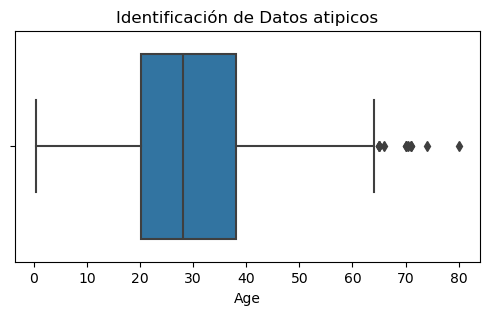

In [158]:
plt.figure(figsize=(6,3))
sns.boxplot(x=Datos['Age'])
plt.title('Identificación de Datos atipicos')

Text(0.5, 1.0, 'Identificación de Datos atipicos')

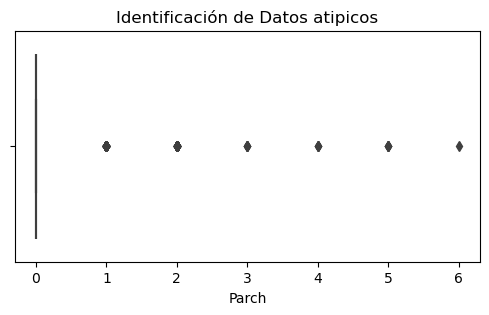

In [159]:
plt.figure(figsize=(6,3))
sns.boxplot(x=Datos['Parch'])
plt.title('Identificación de Datos atipicos')

Text(0.5, 1.0, 'Identificación de Datos Atipicos')

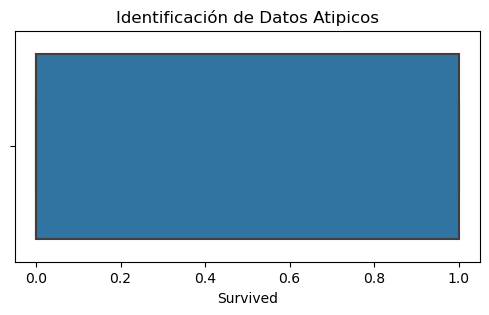

In [160]:
plt.figure(figsize=(6,3))
sns.boxplot(x=Datos['Survived'])
plt.title('Identificación de Datos Atipicos')

In [161]:
print("Cantidad de datos de edad que se encuentran en NaN: ", Datos['Age'].isna().sum())

Cantidad de datos de edad que se encuentran en NaN:  177


In [162]:
promedio_edad = Datos['Age'].mean()

Datos['Age'].fillna(promedio_edad, inplace=True)

print("Cantidad de datos de edad que se encuentran en NaN: ", Datos['Age'].isna().sum())


Cantidad de datos de edad que se encuentran en NaN:  0


In [163]:
print("Cantidad de datos de cabina que se encuentran en NaN: ", Datos['Cabin'].isna().sum())

Cantidad de datos de cabina que se encuentran en NaN:  687


In [164]:
Datos['Cabin'].fillna(0, inplace=True)

print("Cantidad de datos de cabina que se encuentran en NaN: ", Datos['Cabin'].isna().sum())

Cantidad de datos de cabina que se encuentran en NaN:  0


Text(0.5, 1.0, 'Identificacion de datos Atipicos')

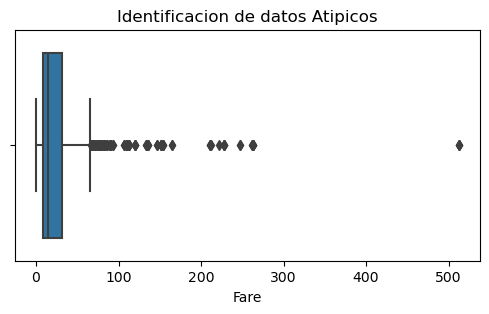

In [165]:
plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['Fare'])
plt.title('Identificacion de datos Atipicos')

In [166]:
max = 300
Datos_Atipicos = (Datos['Fare'] > max).sum()
print("Total de Tarifas más altas que 300: {}".format(Datos_Atipicos))

Total de Tarifas más altas que 300: 3


In [167]:
max = 300
Datos= Datos[Datos['Fare'] <= max]

In [168]:
Datos_Atipicos = (Datos['Fare'] > max).sum()
print("Total de Tarifas más altas que 300: {}".format(Datos_Atipicos))

Total de Tarifas más altas que 300: 0


In [169]:
Datos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 888 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  888 non-null    int64  
 1   Survived     888 non-null    int64  
 2   Pclass       888 non-null    int64  
 3   Name         888 non-null    object 
 4   Sex          888 non-null    object 
 5   Age          888 non-null    float64
 6   SibSp        888 non-null    int64  
 7   Parch        888 non-null    int64  
 8   Ticket       888 non-null    object 
 9   Fare         888 non-null    float64
 10  Cabin        888 non-null    object 
 11  Embarked     886 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 90.2+ KB


In [170]:
Datos['Survived'].value_counts()

Survived
0    549
1    339
Name: count, dtype: int64

In [171]:
Datos[['Survived']].head(20)

,Survived
0,0
1,1
2,1
3,1
4,0
5,0
6,0
7,0
8,1
9,1


In [178]:
columnas_eliminar = ['Survived', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']
x=Datos.drop(columnas_eliminar, axis=1)
y=Datos['Survived']
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.30,stratify=y,random_state=0)

In [179]:
print (x_train)

     PassengerId  Pclass        Age  SibSp  Parch      Fare
537          538       1  30.000000      0      0  106.4250
774          775       2  54.000000      1      3   23.0000
604          605       1  35.000000      0      0   26.5500
432          433       2  42.000000      1      0   26.0000
226          227       2  19.000000      0      0   10.5000
..           ...     ...        ...    ...    ...       ...
131          132       3  20.000000      0      0    7.0500
490          491       3  29.699118      1      0   19.9667
670          671       2  40.000000      1      1   39.0000
48            49       3  29.699118      2      0   21.6792
80            81       3  22.000000      0      0    9.0000

[621 rows x 6 columns]


In [180]:
print (y_train)

537    1
774    1
604    1
432    1
226    1
      ..
131    0
490    0
670    1
48     0
80     0
Name: Survived, Length: 621, dtype: int64


In [181]:
modelo_regresion=LogisticRegression(solver='liblinear')
modelo_regresion.fit (x_train, y_train)
prediccion= modelo_regresion.predict(x_test)

In [182]:
print (y_test)

613    0
704    0
191    0
570    1
788    1
      ..
726    1
655    0
665    0
346    1
221    0
Name: Survived, Length: 267, dtype: int64


In [183]:
print (prediccion)

[0 0 1 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 0
 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 1 1 0
 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 1 0 1 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0
 0 0 0 0 1 1 0 0 1 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 1 0 0
 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 1 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 1 1 1 0 1
 0 1 0 0 0 0 0 0]


In [184]:
print (classification_report(y_test,prediccion))

              precision    recall  f1-score   support

           0       0.72      0.88      0.79       165
           1       0.69      0.44      0.54       102

    accuracy                           0.71       267
   macro avg       0.71      0.66      0.66       267
weighted avg       0.71      0.71      0.69       267



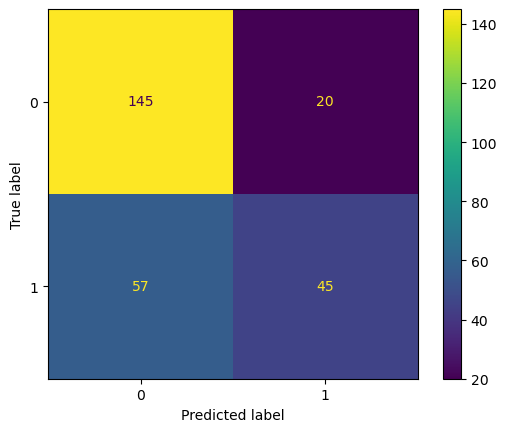

In [185]:
cm=confusion_matrix(y_test,prediccion)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

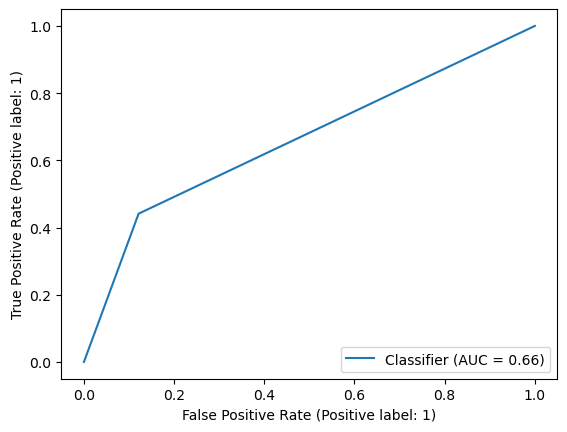

In [186]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(y_test,prediccion)
plt.show()